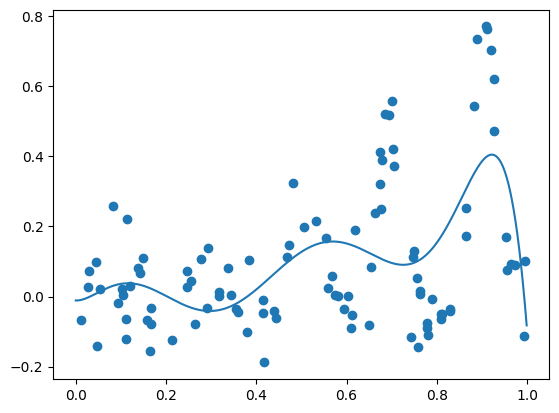

In [2]:

# example of a gaussian process surrogate function
from math import sin
from math import pi
from numpy import arange
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from matplotlib import pyplot
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
 
# objective function
def objective(x, noise=0.1):
 noise = normal(loc=0, scale=noise)
 return (x**2 * sin(5 * pi * x)**6.0) + noise
 
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        return model.predict(X, return_std=True)
 
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()
 
# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot the surrogate function
plot(X, y, model)

In [26]:
from numpy.random import random
X = random(100)
print(X*200 -100)

[-19.70071727  13.09895397  32.86874517  83.05660771 -27.62545408
  66.45815502 -86.55489788  94.95413736 -55.56485885  -7.81126018
 -37.87982031 -10.96742281  61.12617563  67.11596893   1.03361364
  30.72191729 -14.19452161  29.8904302  -79.64430772 -14.60777097
 -78.52153127 -57.06056408  58.24928031 -78.35681093  -6.6823232
  33.24452846  61.07662718 -42.00004374   8.22281459  53.87625063
 -32.45232598 -13.5373171  -25.30612956 -84.36067451  66.93205091
  55.65199088 -31.22820948 -57.63665985  81.28723688  -5.98314753
 -52.60673174  37.42926367  -6.51342038  70.59962464 -52.42492401
 -22.80998707  -3.38279041  41.98509009 -65.30861118  91.94031644
 -37.1558498   -7.62831104  95.25467785  92.02578665 -18.115864
 -19.00569832   3.88330166  57.85233468 -97.38604306 -82.14074285
  79.88241799 -12.91716117 -34.11320308 -47.9246983   83.55110898
  60.03288538  14.34645066 -34.65219902 -99.54296496  73.59149456
  24.1983926   89.45462491  98.75546717  -1.23357138 -68.56675163
  76.64514922

In [33]:
import numpy as np
from numpy.random import random
X = np.random.uniform(0,100,(100,4))
print(X)

[[4.22785203e+01 7.41228366e+01 5.25730287e+01 8.38008419e+01]
 [9.32446407e+01 9.19872243e+01 8.04209908e+01 7.09998413e+01]
 [9.22940482e+01 9.18878831e+01 7.50234835e+01 4.51842881e+01]
 [5.30715412e+01 7.66714797e+01 6.43858979e+01 1.55962270e+01]
 [7.68937473e+01 6.23640874e+01 3.38239796e+01 9.27940864e+01]
 [1.20612253e+01 8.37727863e+01 3.51859369e+00 5.88161234e+01]
 [2.47402466e+01 7.91145481e+00 5.48223912e+01 2.37706231e+01]
 [8.79448091e+01 6.19661447e+01 7.34117924e+00 1.88832181e+01]
 [6.83109484e+01 5.70820195e+01 6.60973095e+01 7.38164375e+00]
 [7.81363527e+01 6.20115327e+01 3.34003844e+01 4.36335664e+01]
 [5.72484871e+01 8.00454041e-01 7.95154441e+01 7.59046748e+01]
 [7.21240527e+01 4.71636740e+01 6.53907079e+01 3.02521459e+01]
 [5.41454927e+01 4.62646906e+01 7.81580111e+01 3.47503670e+01]
 [7.79444551e+01 9.04055370e+01 4.10320937e+01 2.45981509e+01]
 [1.92941946e+01 8.82071578e+01 4.43413324e+01 6.20623292e+00]
 [4.84683958e+01 7.44027682e+01 5.19508096e+01 5.811259

In [75]:
from numpy.random import uniform
from numpy import argmax
from pymoo.problems import get_problem
from numpy.random import normal
problem = get_problem("Griewank")
X = uniform(problem.xl, problem.xu, size=(10000, problem.n_var)) 
model = GaussianProcessRegressor()
model.fit(X, problem.evaluate(X))

yhat = model.predict(np.array([[3,6],[5,9]]).reshape(2,2))
print(yhat)
def surrogate_function(X):
    return model.predict(X, return_std=True)

def acquisition_function(problem,X):
        if problem.has_bounds():
            xl, xu = problem.bounds()
            print(xl,'\n')
            print(xu,'\n')
            #Randomly draw 100 sample points from the search space
            X_sample = uniform(xl, xu, size=(100, problem.n_var))
            print(X_sample,'\n')
            # calculate the current best surrogate score 
            mu, std = surrogate_function(X)
            print(mu,'\n')
            print(std,'\n')
            # calculate mean and stdev of the sample in the surrogate function
            mu_sample, std_sample = surrogate_function(X_sample)
            print(mu_sample,'\n')
            print(std_sample,'\n')
            current_best = max(mu)
            print(current_best,'\n')
            # calculate the probability of improvement
            pi = normal.cdf((mu_sample - current_best) / std_sample)
            print(pi,'\n')
            # locate the index of the largest scores
            index = argmax(pi)
            print(index,'index\n')
            return X_sample[index, :]
        


[[1.41452242e-04]
 [3.24702333e-06]]


In [73]:
model.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': None,
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [76]:



X1 = uniform(problem.xl, problem.xu, size=(100, problem.n_var))

acquisition_function(problem,X1)

[-600. -600.] 

[600. 600.] 

[[-408.98171294  311.74862168]
 [-329.24310742 -260.07136318]
 [ -79.50451878  227.63544164]
 [ 445.46016747  223.26553997]
 [-388.21136031 -373.39232167]
 [-107.02061939  -47.76921112]
 [ 592.26519275  536.61815621]
 [  57.63856178 -256.70511498]
 [ -23.55254616  589.59370361]
 [ 218.02177001  476.39058467]
 [  29.70916684 -256.70932642]
 [-337.72795908   54.9080401 ]
 [ 285.69939427 -197.85780467]
 [-361.10657136  450.85659629]
 [ 489.07308466 -188.49992392]
 [-207.84214734 -522.95814454]
 [ 337.92021527 -111.97220362]
 [-478.30917215 -318.41196613]
 [ 575.71091716 -194.02891097]
 [ 355.08796905  482.59584475]
 [-182.52053495  406.04519324]
 [ 169.30462421  -62.33508891]
 [ 204.2771108  -237.59553765]
 [  23.5939451   273.00409016]
 [   8.07814185  349.96767115]
 [-297.34952392 -472.61242166]
 [ 593.56082767  213.86901656]
 [-425.40590452  589.91938619]
 [ -44.54368641 -410.7798614 ]
 [  57.1828443   490.57740837]
 [-387.64441581  -54.09478618]
 [-254.09

AttributeError: 'builtin_function_or_method' object has no attribute 'cdf'

In [1]:
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.termination import get_termination
from random import randint
from pymoo.termination.ftol import SingleObjectiveSpaceTermination
from pymoo.termination.robust import RobustTermination
from pymoo.termination.default import DefaultMultiObjectiveTermination
from Bayesian_Optimization_Algorithm import BayesianOptimiztion


In [2]:
algorithm3 = BayesianOptimiztion()
res = minimize(get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi),
                algorithm3,
                save_history=True,
                seed = 1,
                verbose=False)

Exception: Population Set Attribute Error: Number of values and population size do not match!